In [1]:
import matplotlib.pyplot as plt

from New_GUI_Analysis_Functions import *
%matplotlib widget

In [2]:
# Define plotting parameters
unitary_stim_starts_older = {
    'channel_1': [500.0, 800.3, 1100.6],
    'channel_2': [1500.0, 1800.3, 2100.6]
}

unitary_stim_starts_newer = {
    'channel_1': [500.0, 800.0, 1100.0],
    'channel_2': [1500.0, 1800.0, 2100.0]
}

ISI_times_dict_old = {
    300: [500.0, 800.3, 1100.6],
    100: [500.0, 600.3, 700.6],
    50:  [500.0, 550.3, 600.6],
    25:  [500.0, 525.3, 550.6],
    10:  [500.0, 510.3, 520.6]
}

ISI_times_dict = {
    300: [500.0, 800.0, 1100.0],
    100: [500.0, 600.0, 700.0],
    50:  [500.0, 550.0, 600.0],
    25:  [500.0, 525.0, 550.0],
    10:  [500.0, 510.0, 520.0]
}

ISI_times_list = [300, 100, 50, 25, 10]
channels = ['channel_1', 'channel_2']
channel_names = ['Perforant Pathway', 'Schaffer Collateral Pathway']
conditions = ['Control', 'Gabazine']
colors = ['black', 'red']

# Directories for WT data
WT_dirs = {
    'NMDG_E_I': '/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/WT_data/Processed_data/WT_042024_on_processed_data/updated_files_NMDG_E_I',
    'Sucrose_E_I': '/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/WT_data/Processed_data/WT_042024_on_processed_data/updated_files_Sucrose_E_I',
    'Older_NMDG_E_I': '/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/WT_data/Processed_data/WT_Before_04222024_processed_data'
}

# Process WT data
E_I_traces_NMDG = get_E_I_traces(WT_dirs['NMDG_E_I'], unitary_stim_starts_older)
WT_NMDG_holding_potentials = extract_holding_potentials(E_I_traces_NMDG) 

E_I_traces_sucrose = get_E_I_traces(WT_dirs['Sucrose_E_I'], unitary_stim_starts_newer)
WT_sucrose_holding_potentials = extract_holding_potentials(E_I_traces_sucrose) 

E_I_traces_old = get_E_I_traces(WT_dirs['Older_NMDG_E_I'], unitary_stim_starts_older)
WT_older_holding_potentials = extract_holding_potentials(E_I_traces_old) 

E_I_amplitudes_NMDG, E_I_traces_NMDG = get_E_I_amplitudes_and_estimated_inhibition_traces(E_I_traces_NMDG)
E_I_amplitudes_sucrose, E_I_traces_sucrose = get_E_I_amplitudes_and_estimated_inhibition_traces(E_I_traces_sucrose)
E_I_amplitudes_old, E_I_traces_old = get_E_I_amplitudes_and_estimated_inhibition_traces(E_I_traces_old)

E_I_imbalance_NMDG = get_E_I_imbalance(E_I_amplitudes_NMDG)
E_I_imbalance_sucrose = get_E_I_imbalance(E_I_amplitudes_sucrose)
E_I_imbalance_old = get_E_I_imbalance(E_I_amplitudes_old)

#expected EPSPs
expected_EPSPs_NMDG, expected_EPSPs_peaks_NMDG = get_expected_EPSPs_multiple_cells(E_I_traces_NMDG, ISI_times_dict_old)
expected_EPSPs_sucrose, expected_EPSPs_peaks_sucrose = get_expected_EPSPs_multiple_cells(E_I_traces_sucrose, ISI_times_dict)
expected_EPSPs_old, expected_EPSPs_peaks_old = get_expected_EPSPs_multiple_cells(E_I_traces_old, ISI_times_dict_old)

E_I_imbalance_means_NMDG, E_I_imbalance_std_errors_NMDG = get_E_I_imbalance_mean_std_error(E_I_imbalance_NMDG, ISI_times_list, channels)
E_I_imbalance_means_sucrose, E_I_imbalance_std_errors_sucrose = get_E_I_imbalance_mean_std_error(E_I_imbalance_sucrose, ISI_times_list, channels)
E_I_imbalance_means_old, E_I_imbalance_std_errors_old = get_E_I_imbalance_mean_std_error(E_I_imbalance_old, ISI_times_list, channels)




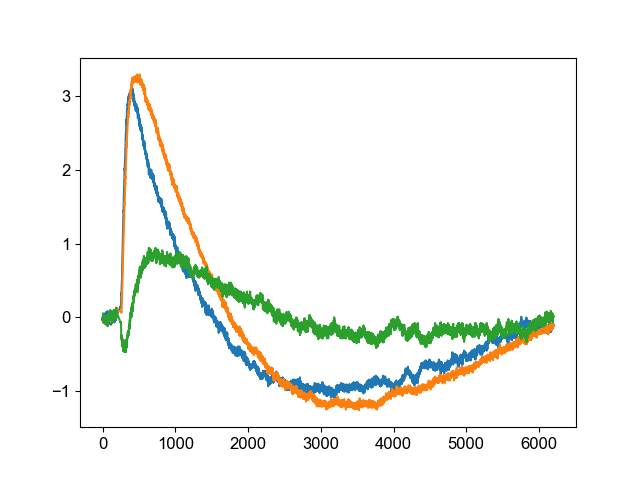

In [3]:
plt.figure()
plt.plot(E_I_traces_sucrose['07092024_c4_updated_08102024_example_cell'][300]['channel_1']['Control']['unitary_average_traces'])
plt.plot(E_I_traces_sucrose['07092024_c4_updated_08102024_example_cell'][300]['channel_1']['Gabazine']['unitary_average_traces'])
plt.plot(E_I_traces_sucrose['07092024_c4_updated_08102024_example_cell'][300]['channel_1']['estimated_inhibition']['unitary_average_traces'])

In [4]:
# Directories for GNB1 data
GNB1_dirs = {
    'NMDG': '/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/GNB1_data/Processed_data/GNB1_0420204_on_processed_data/NMDG',
    'Sucrose': '/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/GNB1_data/Processed_data/GNB1_0420204_on_processed_data/Sucrose',
    'Older_NMDG': '/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/GNB1_data/Processed_data/GNB1_Before_04222024_processed_data'
}

# Process GNB1 data
E_I_traces_NMDG_GNB1 = get_E_I_traces(GNB1_dirs['NMDG'], unitary_stim_starts_older)
GNB1_NMDG_holding_potentials = extract_holding_potentials(E_I_traces_NMDG_GNB1)

E_I_traces_sucrose_GNB1 = get_E_I_traces(GNB1_dirs['Sucrose'], unitary_stim_starts_newer)
GNB1_sucrose_holding_potentials = extract_holding_potentials(E_I_traces_sucrose_GNB1) 

E_I_traces_old_GNB1 = get_E_I_traces(GNB1_dirs['Older_NMDG'], unitary_stim_starts_older)
GNB1_older_holding_potentials = extract_holding_potentials(E_I_traces_old_GNB1) 

E_I_amplitudes_NMDG_GNB1, E_I_traces_NMDG_GNB1 = get_E_I_amplitudes_and_estimated_inhibition_traces(E_I_traces_NMDG_GNB1)
E_I_amplitudes_sucrose_GNB1, E_I_traces_sucrose_GNB1 = get_E_I_amplitudes_and_estimated_inhibition_traces(E_I_traces_sucrose_GNB1)
E_I_amplitudes_old_GNB1, E_I_traces_old_GNB1 = get_E_I_amplitudes_and_estimated_inhibition_traces(E_I_traces_old_GNB1)

E_I_imbalance_NMDG_GNB1 = get_E_I_imbalance(E_I_amplitudes_NMDG_GNB1)
E_I_imbalance_sucrose_GNB1 = get_E_I_imbalance(E_I_amplitudes_sucrose_GNB1)
E_I_imbalance_old_GNB1 = get_E_I_imbalance(E_I_amplitudes_old_GNB1)

expected_EPSPs_NMDG_GNB1, expected_EPSPs_peaks_NMDG_GNB1 = get_expected_EPSPs_multiple_cells(E_I_traces_NMDG_GNB1, ISI_times_dict_old)
expected_EPSPs_sucrose_GNB1, expected_EPSPs_peaks_sucrose_GNB1 = get_expected_EPSPs_multiple_cells(E_I_traces_sucrose_GNB1, ISI_times_dict)
expected_EPSPs_old_GNB1, expected_EPSPs_peaks_old_GNB1 = get_expected_EPSPs_multiple_cells(E_I_traces_old_GNB1, ISI_times_dict_old)

E_I_imbalance_means_NMDG_GNB1, E_I_imbalance_std_errors_NMDG_GNB1 = get_E_I_imbalance_mean_std_error(E_I_imbalance_NMDG_GNB1, ISI_times_list, channels)
E_I_imbalance_means_sucrose_GNB1, E_I_imbalance_std_errors_sucrose_GNB1 = get_E_I_imbalance_mean_std_error(E_I_imbalance_sucrose_GNB1, ISI_times_list, channels)
E_I_imbalance_means_old_GNB1, E_I_imbalance_std_errors_old_GNB1 = get_E_I_imbalance_mean_std_error(E_I_imbalance_old_GNB1, ISI_times_list, channels)

Error calculating estimated inhibition for cell 01302024_c3_processed_data, ISI 300, channel channel_2: operands could not be broadcast together with shapes (6200,) (4200,) 


/Users/samgritz/Desktop/Rutgers/Milstein_Lab/Code/Rutgers-Neuroscience-PhD/Ephys_Analysis/Updated_Code/Intracellular_Analysis/Plotting_Scripts/New_GUI_Analysis_Functions.py:1332: RuntimeWarning: Mean of empty slice
  E_I_means[channel][ISI_time] = np.nanmean(working_data)
/Users/samgritz/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [5]:
E_I_imbalance_NMDG_GNB1 

{'05092024_c3_processed_data': {300: {'channel_1': [0.7293102664647098],
   'channel_2': [0.5654106763418774]},
  100: {'channel_1': [0.592624741394495], 'channel_2': [0.6479976071820795]},
  50: {'channel_1': [0.5428529643771304], 'channel_2': [0.6224177717614624]},
  25: {'channel_1': [], 'channel_2': []},
  10: {'channel_1': [], 'channel_2': []}},
 '05072024_c1_processed_data': {300: {'channel_1': [], 'channel_2': []},
  100: {'channel_1': [], 'channel_2': []}},
 '05092024_c1_processed_data': {300: {'channel_1': [0.5811500333063493],
   'channel_2': [0.6596389991590939]},
  100: {'channel_1': [0.5167711457422768], 'channel_2': [0.7239865461539625]},
  50: {'channel_1': [], 'channel_2': []},
  25: {'channel_1': [0.5205949956249429], 'channel_2': [0.6436444151561392]},
  10: {'channel_1': [], 'channel_2': []}}}

### Plotting Expected EPSP and Measured EPSPs Examples

### Plotting Example E_I experiments

In [6]:
# Example of how to use the function
# plot_all_cells_graphs(E_I_traces_old, ISI_times_list, get_compound_EPSPs)

In [7]:
# plot_all_cells_graphs(E_I_traces_old_GNB1, ISI_times_list, get_compound_EPSPs)

### combine the data - excluding older data

In [8]:
#combine the data for WT and GNB1 - excluding Older data 

#dont combine the older data
combined_WT_E_I_data = {}
combined_WT_E_I_data['holding_potentials'] = {**WT_NMDG_holding_potentials, **WT_sucrose_holding_potentials, **WT_older_holding_potentials}
combined_WT_E_I_data['EPSP_amplitudes'] = {**E_I_amplitudes_NMDG, **E_I_amplitudes_sucrose, **E_I_amplitudes_old}
# combined_WT_E_I_data['estimated_inhibition'] = {**estimated_inhibition_NMDG, **estimated_inhibition_sucrose, **estimated_inhibition_old}
combined_WT_E_I_data['E_I_imbalance'] = {**E_I_imbalance_NMDG, **E_I_imbalance_sucrose, **E_I_imbalance_old}
combined_WT_E_I_data['expected_EPSP_amplitudes'] = {**expected_EPSPs_peaks_NMDG, **expected_EPSPs_peaks_sucrose, **expected_EPSPs_peaks_old}


combined_GNB1_E_I_data = {}
combined_GNB1_E_I_data['holding_potentials'] = {**GNB1_NMDG_holding_potentials, **GNB1_sucrose_holding_potentials, **GNB1_older_holding_potentials}
combined_GNB1_E_I_data['EPSP_amplitudes'] = {**E_I_amplitudes_NMDG_GNB1, **E_I_amplitudes_sucrose_GNB1, **E_I_amplitudes_old_GNB1}
# combined_GNB1_E_I_data['estimated_inhibition'] = {**estimated_inhibition_NMDG_GNB1, **estimated_inhibition_sucrose_GNB1, **estimated_inhibition_old_GNB1}
combined_GNB1_E_I_data['E_I_imbalance'] = {**E_I_imbalance_NMDG_GNB1, **E_I_imbalance_sucrose_GNB1, **E_I_imbalance_old_GNB1}
combined_GNB1_E_I_data['expected_EPSP_amplitudes'] = {**expected_EPSPs_peaks_NMDG_GNB1, **expected_EPSPs_peaks_sucrose_GNB1, **expected_EPSPs_peaks_old_GNB1} 

In [9]:
# combined_WT_E_I_data

# Getting E/I data from multiple cells and Plotting

In [10]:
# combined_WT_E_I_data['EPSP_amplitudes'].keys()

combined_WT_E_I_data['EPSP_amplitudes'].keys()

### WT E_I data plotting - amplitudes, estimated inhibition, compound EPSP, and E/I imbalance

In [11]:
# # ## TODO: see why shaffer collateral GABAzine responses are smaller than control!!!

# # fig, ax = plt.subplots(2, 1, figsize=(6, 10))
# # fig.suptitle('Full E_I experiments NMDG E-I Experiments - WT', fontsize=14)

# # # Define constants
# # ISI_times = list(ISI_times_dict_old.keys())
# # channels = ['channel_1', 'channel_2']
# # channel_names = ['Perforant Path', 'Schaffer Collateral']
# # conditions = ['Control', 'Gabazine']
# # colors = ['black', 'red']

# # plot_full_E_I_experiment(E_I_amplitudes_NMDG, compound_EPSPs_peaks_NMDG, ISI_times, channels, channel_names, conditions, colors, fig, ax)

# # fig, ax = plt.subplots(2, 1, figsize=(6, 10))
# # fig.suptitle('Full E_I experiments Sucrose E-I Experiments - WT', fontsize=14)

# # plot_full_E_I_experiment(E_I_amplitudes_sucrose, compound_EPSPs_peaks_sucrose, ISI_times, channels, channel_names, conditions, colors, fig, ax)

# fig, ax = plt.subplots(2, 1, figsize=(6, 10))

# fig.suptitle('Full E_I experiments Older NMDG E-I Experiments - WT', fontsize=14)

# plot_full_E_I_experiment(E_I_amplitudes_old, compound_EPSPs_peaks_old, ISI_times_list, channels, channel_names, conditions, colors, fig, ax)


### Plotting E/I Imbalance

In [12]:
# ISI_times_list = [300, 100, 50, 25, 10]
# channels = ['channel_1', 'channel_2']
# channel_names = ['Perforant Path', 'Schaffer Collateral']
# 
# fig, ax = plt.subplots(2, 1, figsize=(6, 10))
# 
# fig.suptitle('E/I Imbalance for NMDG Conditions WT')
# 
# for i, channel in enumerate(channels):
#     ax[i].set_title(f'{channel_names[i]}')
#     ax[i].set_xlabel('ISI Time (ms)')
#     ax[i].set_ylabel('E/I Imbalance')
# 
#     for color in colors: 
#         means = E_I_imbalance_means_NMDG
#         std_errors = E_I_imbalance_std_errors_NMDG
# 
#         ax[i].errorbar(range(len(ISI_times_list)), [means[channel][ISI_time] for ISI_time in ISI_times_list], 
#                        yerr=[std_errors[channel][ISI_time] for ISI_time in ISI_times_list], 
#                         color='black', marker='o', capsize=5)
# 
#         ax[i].set_xticks(range(len(ISI_times_list)))
#         ax[i].set_xticklabels(ISI_times_list) 
# 
# plt.tight_layout()
# plt.show()
# 
# fig, ax = plt.subplots(2, 1, figsize=(6, 10))
# 
# fig.suptitle('E/I Imbalance for Sucrose Conditions WT')
# 
# for i, channel in enumerate(channels):
#     ax[i].set_title(f'{channel_names[i]}')
#     ax[i].set_xlabel('ISI Time (ms)')
#     ax[i].set_ylabel('E/I Imbalance')
# 
#     for color in colors: 
#         means = E_I_imbalance_means_sucrose
#         std_errors = E_I_imbalance_std_errors_sucrose
# 
#         ax[i].errorbar(range(len(ISI_times_list)), [means[channel][ISI_time] for ISI_time in ISI_times_list], 
#                        yerr=[std_errors[channel][ISI_time] for ISI_time in ISI_times_list], 
#                         color='black', marker='o', capsize=5)
# 
#         ax[i].set_xticks(range(len(ISI_times_list)))
#         ax[i].set_xticklabels(ISI_times_list)
# 
# plt.tight_layout()
# plt.show()
# 
# fig, ax = plt.subplots(2, 1, figsize=(6, 10))
# 
# fig.suptitle('E/I Imbalance for Older NMDG Conditions WT')
# 
# for i, channel in enumerate(channels):
#     ax[i].set_title(f'{channel_names[i]}')
#     ax[i].set_xlabel('ISI Time (ms)')
#     ax[i].set_ylabel('E/I Imbalance')
# 
#     for color in colors: 
#         means = E_I_imbalance_means_old
#         std_errors = E_I_imbalance_std_errors_old
# 
#         ax[i].errorbar(range(len(ISI_times_list)), [means[channel][ISI_time] for ISI_time in ISI_times_list], 
#                        yerr=[std_errors[channel][ISI_time] for ISI_time in ISI_times_list], 
#                         color='black', marker='o', capsize=5)
# 
#         ax[i].set_xticks(range(len(ISI_times_list)))
#         ax[i].set_xticklabels(ISI_times_list)
# 
# plt.tight_layout()
# 
# plt.show()

### GNB1 E_I data plotting

In [13]:

# fig, ax = plt.subplots(2, 1, figsize=(6, 10))
# fig.suptitle('Full E_I experiments NMDG E-I Experiments - GNB1', fontsize=14)

# # Define constants
# ISI_times = list(ISI_times_dict_old.keys())
# channels = ['channel_1', 'channel_2']
# channel_names = ['Perforant Path', 'Schaffer Collateral']
# conditions = ['Control', 'Gabazine']
# colors = ['black', 'red']

# plot_full_E_I_experiment(E_I_amplitudes_NMDG_GNB1, compound_EPSPs_peaks_NMDG_GNB1, ISI_times, channels, channel_names, conditions, colors, fig, ax)

# fig, ax = plt.subplots(2, 1, figsize=(6, 10))
# fig.suptitle('Full E_I experiments Sucrose E-I Experiments - GNB1', fontsize=14)

# plot_full_E_I_experiment(E_I_amplitudes_sucrose_GNB1, compound_EPSPs_peaks_sucrose_GNB1, ISI_times, channels, channel_names, conditions, colors, fig, ax)


# fig, ax = plt.subplots(2, 1, figsize=(6, 10))

# fig.suptitle('Full E_I experiments Older NMDG E-I Experiments - GNB1', fontsize=14)

# plot_full_E_I_experiment(E_I_amplitudes_old_GNB1, compound_EPSPs_peaks_old_GNB1, ISI_times_list, channels, channel_names, conditions, colors, fig, ax)


### plotting E_I imbalance per condition for GNB1

In [14]:
# ISI_times_list = [300, 100, 50, 25, 10]
# channels = ['channel_1', 'channel_2']
# channel_names = ['Perforant Path', 'Schaffer Collateral']


# fig, ax = plt.subplots(2, 1, figsize=(6, 10))

# fig.suptitle('E/I Imbalance for NMDG Conditions GNB1')

# for i, channel in enumerate(channels):
#     ax[i].set_title(f'{channel_names[i]}')
#     ax[i].set_xlabel('ISI Time (ms)')
#     ax[i].set_ylabel('E/I Imbalance')

#     for color in colors: 
#         means = E_I_imbalance_means_NMDG_GNB1
#         std_errors = E_I_imbalance_std_errors_NMDG_GNB1

#         ax[i].errorbar(range(len(ISI_times_list)), [means[channel][ISI_time] for ISI_time in ISI_times_list], 
#                        yerr=[std_errors[channel][ISI_time] for ISI_time in ISI_times_list], 
#                         color='red', marker='o', capsize=5)

#         ax[i].set_xticks(range(len(ISI_times_list)))
#         ax[i].set_xticklabels(ISI_times_list) 

# plt.tight_layout()
# plt.show()

# fig, ax = plt.subplots(2, 1, figsize=(6, 10))

# fig.suptitle('E/I Imbalance for Sucrose Conditions GNB1')

# for i, channel in enumerate(channels):
#     ax[i].set_title(f'{channel_names[i]}')
#     ax[i].set_xlabel('ISI Time (ms)')
#     ax[i].set_ylabel('E/I Imbalance')

#     for color in colors: 
#         means = E_I_imbalance_means_sucrose_GNB1
#         std_errors = E_I_imbalance_std_errors_sucrose_GNB1

#         ax[i].errorbar(range(len(ISI_times_list)), [means[channel][ISI_time] for ISI_time in ISI_times_list], 
#                        yerr=[std_errors[channel][ISI_time] for ISI_time in ISI_times_list], 
#                         color='red', marker='o', capsize=5)

#         ax[i].set_xticks(range(len(ISI_times_list)))
#         ax[i].set_xticklabels(ISI_times_list)

# plt.tight_layout()
# plt.show()

# fig, ax = plt.subplots(2, 1, figsize=(6, 10))

# fig.suptitle('E/I Imbalance for Older NMDG Conditions GNB1')

# for i, channel in enumerate(channels):
#     ax[i].set_title(f'{channel_names[i]}')
#     ax[i].set_xlabel('ISI Time (ms)')
#     ax[i].set_ylabel('E/I Imbalance')

#     for color in colors: 
#         means = E_I_imbalance_means_old_GNB1
#         std_errors = E_I_imbalance_std_errors_old_GNB1

#         ax[i].errorbar(range(len(ISI_times_list)), [means[channel][ISI_time] for ISI_time in ISI_times_list], 
#                        yerr=[std_errors[channel][ISI_time] for ISI_time in ISI_times_list], 
#                         color='red', marker='o', capsize=5)

#         ax[i].set_xticks(range(len(ISI_times_list)))
#         ax[i].set_xticklabels(ISI_times_list)
    
# plt.tight_layout()
# plt.show()

## Plot the combined data WT vs GNB1

### Plotting Full E_I experiments GNB1 vs WT

In [15]:
combined_WT_E_I_data

{'holding_potentials': {'04232024_c3_updated_08102024': {300: {'channel_1': {'Control': {'holding_potential': [-70.6061724408315]}},
    'channel_2': {'Control': {'holding_potential': [-70.27568552015053]}}},
   100: {'channel_1': {'Control': {'holding_potential': [-70.19713430725565]}},
    'channel_2': {'Control': {'holding_potential': [-70.37864386254333]}}},
   50: {'channel_1': {'Control': {'holding_potential': [-70.2527338576891]}},
    'channel_2': {'Control': {'holding_potential': [-70.81795511475357]}}},
   25: {'channel_1': {'Control': {'holding_potential': [-71.05217205317827]}},
    'channel_2': {'Control': {'holding_potential': [-71.3623919040667]}}},
   10: {'channel_1': {'Control': {'holding_potential': [-71.20429681465559]}},
    'channel_2': {'Control': {'holding_potential': [-71.43184525549177]}}}},
  '05302024_c2_updated_08102024': {300: {'channel_1': {'Control': {'holding_potential': [-69.97614992966302]}},
    'channel_2': {'Control': {'holding_potential': [-70.457

WT
channel_1: 19
WT
channel_2: 20
WT
channel_1: 19
WT
channel_2: 20
WT
channel_1: 18
WT
channel_2: 19
WT
channel_1: 17
WT
channel_2: 16
WT
channel_1: 15
WT
channel_2: 14
WT
channel_1: 14
WT
channel_2: 13
WT
channel_1: 14
WT
channel_2: 13
WT
channel_1: 11
WT
channel_2: 11
WT
channel_1: 12
WT
channel_2: 12
WT
channel_1: 11
WT
channel_2: 12
GNB1
channel_1: 15
GNB1
channel_2: 19
GNB1
channel_1: 16
GNB1
channel_2: 16
GNB1
channel_1: 15
GNB1
channel_2: 16
GNB1
channel_1: 14
GNB1
channel_2: 16
GNB1
channel_1: 13
GNB1
channel_2: 14
GNB1
channel_1: 12
GNB1
channel_2: 11
GNB1
channel_1: 12
GNB1
channel_2: 12
GNB1
channel_1: 10
GNB1
channel_2: 10
GNB1
channel_1: 10
GNB1
channel_2: 10
GNB1
channel_1: 9
GNB1
channel_2: 9


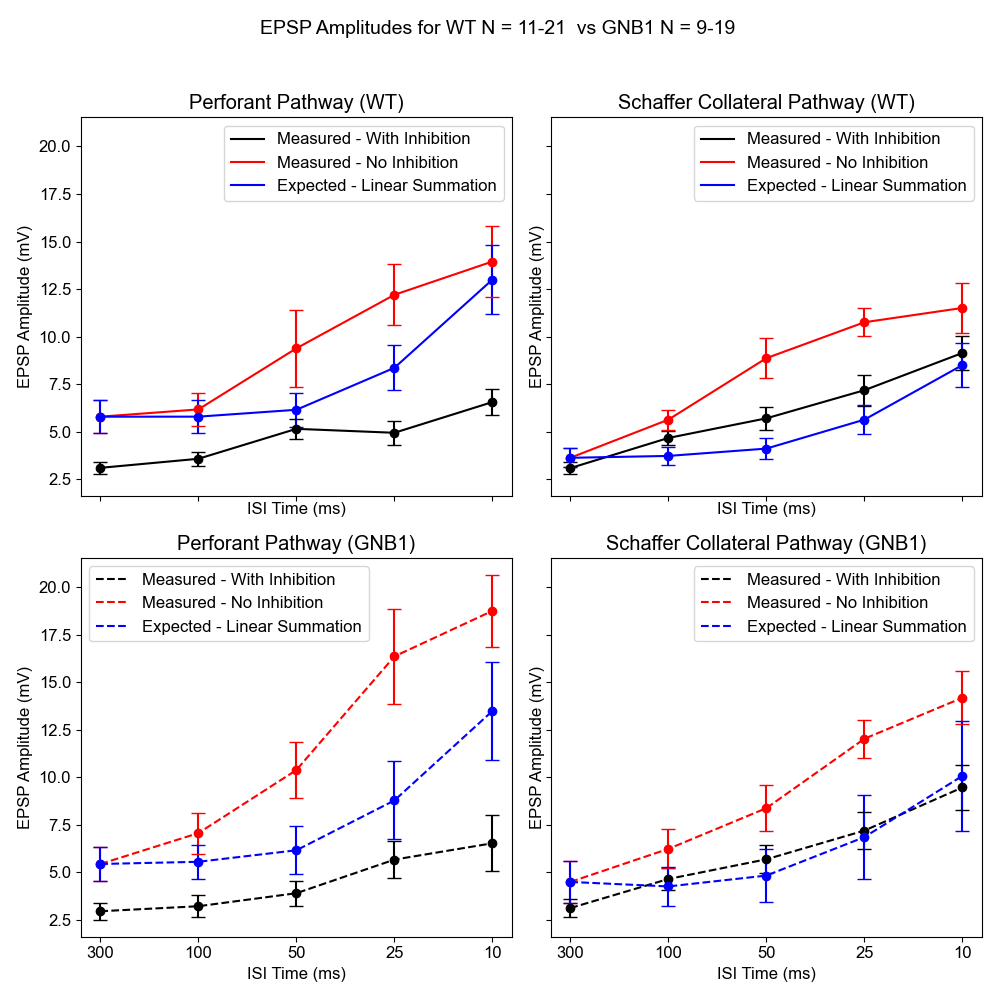

In [67]:

fig, ax = plt.subplots(2, 2, figsize=(10, 10) , sharex=True, sharey=True)
fig.suptitle(f'EPSP Amplitudes for WT N = 11-21  vs GNB1 N = 9-19 ', fontsize=14)

plot_EPSP_data(combined_WT_E_I_data, combined_GNB1_E_I_data, ISI_times_list, channels, channel_names, conditions, colors, fig, ax)

#save as svg
# plt.savefig('/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/GNB1_data/Processed_data/saved_figures/GNB1_vs_WT_data/combined_all_data/All_Combined_EPSP_Amps_new.svg', format='svg') 

## Linear Mixed Effects for E_I Amplitude and Estimated_Inhibition 

First Convert to dataframe the data to analyze - data is in the format of a dictionary where the keys are the different analysis types <br>

But have to pull out all of the values <br>

Organize by: 'Cell' 'ISI' 'Amplitude' 'Condition' 'Channel' 'Genotype' 'Holding Potential' 'Slicing Solution' <br>

Example Row:  c_1    300    2.56        Control    channel_1    WT          -70.76              NMDG

In [17]:
import pandas as pd

def E_I_EPSP_Amplitude_dict_to_df(data_dict, expected_data_dict, holding_potential_dict, genotype_label, slicing_solution, condition_pairing=False):
    data = []
    
    # Define a mapping for condition conversion
    condition_mapping = {
        'control': 'Control',
        'gabazine': 'Gabazine'
    }
    
    # Create a nested dictionary to store compound EPSP amplitudes
    expected_amplitude_dict = {}
    
    for cell in expected_data_dict:
        expected_amplitude_dict[cell] = {}
        for channel in expected_data_dict[cell]:
            expected_amplitude_dict[cell][channel] = {}
            for ISI in expected_data_dict[cell][channel]:
                max_peak_value = expected_data_dict[cell][channel][ISI].get('max_peak_value', None)
                # Ensure max_peak_value is not an empty dictionary
                if isinstance(max_peak_value, dict) and not max_peak_value:
                    max_peak_value = None
                expected_amplitude_dict[cell][channel][ISI] = max_peak_value
    
    for cell in data_dict:
        if cell in holding_potential_dict:
            for ISI_time in data_dict[cell]:
                for channel in data_dict[cell][ISI_time]:
                    if not condition_pairing or ('Control' in data_dict[cell][ISI_time][channel] and 'Gabazine' in data_dict[cell][ISI_time][channel]):
                        for condition in data_dict[cell][ISI_time][channel]:
                            if data_dict[cell][ISI_time][channel][condition]:
                                EPSP_amplitude = data_dict[cell][ISI_time][channel][condition]['max_peak_value']
                                #holding_potential = holding_potential_dict[cell][ISI_time][channel][condition]['holding_potential']
                                
                                # Get expected EPSP amplitude if available
                                expected_EPSP_amplitude = expected_amplitude_dict.get(cell, {}).get(channel, {}).get(ISI_time, None)
        
                                if EPSP_amplitude:
                                    # Convert condition to uppercase if it matches the specified mapping
                                    condition_upper = condition_mapping.get(condition.lower(), condition)
        
                                    data.append({
                                        'Cell': cell,
                                        'ISI': ISI_time,
                                        'EPSP_Amplitude': EPSP_amplitude,
                                        'Expected_EPSP_Amplitude': expected_EPSP_amplitude,
                                        'Condition': condition_upper,
                                        'Channel': channel,
                                        'Genotype': genotype_label,
                                        # 'Holding_Potential': holding_potential[0],
                                        'Slicing_Solution': slicing_solution
                                    })

    return pd.DataFrame(data)


In [18]:
# print(GNB1_sucrose_holding_potentials.keys())
# print(E_I_amplitudes_sucrose_GNB1.keys()) 

In [19]:
#generate groups to compare across

### EPSP Amplitudes

In [20]:
WT_E_I_amplitudes_df_NMDG = E_I_EPSP_Amplitude_dict_to_df(E_I_amplitudes_NMDG, expected_EPSPs_peaks_NMDG,  WT_NMDG_holding_potentials, 'WT', 'NMDG', condition_pairing=True)
WT_E_I_amplitudes_df_sucrose = E_I_EPSP_Amplitude_dict_to_df(E_I_amplitudes_sucrose, expected_EPSPs_peaks_sucrose, WT_sucrose_holding_potentials, 'WT', 'Sucrose', condition_pairing=True)
WT_E_I_amplitudes_df_old_NMDG = E_I_EPSP_Amplitude_dict_to_df(E_I_amplitudes_old, expected_EPSPs_peaks_old,  WT_older_holding_potentials, 'WT', 'NMDG', condition_pairing=True)
# 
# #Combined NMDG
# combined_WT_E_I_amplitude_NMDG_df = pd.concat([WT_E_I_amplitudes_df_NMDG, WT_E_I_amplitudes_df_old_NMDG], ignore_index= True) 
# #Combine all WT
combined_WT_E_I_amplitude_df = pd.concat([WT_E_I_amplitudes_df_NMDG, WT_E_I_amplitudes_df_sucrose, WT_E_I_amplitudes_df_old_NMDG], ignore_index= True) 
# 
GNB1_E_I_amplitudes_df_NMDG = E_I_EPSP_Amplitude_dict_to_df(E_I_amplitudes_NMDG_GNB1, expected_EPSPs_peaks_NMDG_GNB1, GNB1_NMDG_holding_potentials, 'GNB1', 'NMDG', condition_pairing=True)
GNB1_E_I_amplitudes_df_sucrose = E_I_EPSP_Amplitude_dict_to_df(E_I_amplitudes_sucrose_GNB1, expected_EPSPs_peaks_sucrose_GNB1, GNB1_sucrose_holding_potentials, 'GNB1', 'Sucrose', condition_pairing=True)
GNB1_E_I_amplitudes_df_old_NMDG = E_I_EPSP_Amplitude_dict_to_df(E_I_amplitudes_old_GNB1, expected_EPSPs_peaks_old_GNB1, GNB1_older_holding_potentials, 'GNB1', 'NMDG', condition_pairing=True)
# 
# #Combine NMDG
# combined_GNB1_E_I_amplitude_NMDG_df = pd.concat([GNB1_E_I_amplitudes_df_NMDG, GNB1_E_I_amplitudes_df_old_NMDG], ignore_index= True) 
# #Combined all GNB1
combined_GNB1_E_I_amplitude_df = pd.concat([GNB1_E_I_amplitudes_df_NMDG, GNB1_E_I_amplitudes_df_sucrose, GNB1_E_I_amplitudes_df_old_NMDG],  ignore_index=True) 
# 
# #Compare All
all_combined_E_I_amplitude_df = pd.concat([combined_WT_E_I_amplitude_df, combined_GNB1_E_I_amplitude_df], ignore_index=True) 

#Compare Sucrose
# all_combined_E_I_amplitude_df = pd.concat([WT_E_I_amplitudes_df_sucrose, GNB1_E_I_amplitudes_df_sucrose] , ignore_index= True) 

#Compare NMDG 
# all_combined_E_I_amplitude_df = pd.concat([combined_WT_E_I_amplitude_NMDG_df, combined_GNB1_E_I_amplitude_NMDG_df] , ignore_index= True) 


#Compare NMDG


In [21]:
df_EPSP_amplitudes = all_combined_E_I_amplitude_df 
df = df_EPSP_amplitudes

In [22]:
# perforant_path_EPSP_amplitudes = df[df['Channel'] == 'channel_1']
# schaffer_collateral_EPSP_amplitudes = df[df['Channel'] == 'channel_2'] 

### Linear Mixed Effects

In [23]:
df = df_EPSP_amplitudes 

In [24]:
df 

,Cell,ISI,EPSP_Amplitude,Expected_EPSP_Amplitude,Condition,Channel,Genotype,Slicing_Solution
0,05162024_updated_08182024,300,3.118275,10.578781,Control,channel_1,WT,NMDG
1,05162024_updated_08182024,300,10.578781,10.578781,Gabazine,channel_1,WT,NMDG
2,05162024_updated_08182024,300,13.898065,10.578781,estimated_inhibition,channel_1,WT,NMDG
3,05162024_updated_08182024,300,2.651388,1.956394,Control,channel_2,WT,NMDG
4,05162024_updated_08182024,300,1.956394,1.956394,Gabazine,channel_2,WT,NMDG
...,...,...,...,...,...,...,...,...
653,04042024_c2_processed_data,25,30.842273,7.049818,Gabazine,channel_1,GNB1,NMDG
654,04042024_c2_processed_data,25,31.960929,7.049818,estimated_inhibition,channel_1,GNB1,NMDG
655,04042024_c2_processed_data,25,6.077581,5.379796,Control,channel_2,GNB1,NMDG
656,04042024_c2_processed_data,25,17.727754,5.379796,Gabazine,channel_2,GNB1,NMDG


In [25]:

#conjugated group
#make a copy of the dataframe
df = df.copy()

# Create 'Conjugated_Group' by concatenating 'Condition', 'Genotype', and 'Channel'
df['Conjugated_Group'] = df['Condition'].str.cat(df[['Genotype', 'Channel']], sep='.')




In [26]:
df 

,Cell,ISI,EPSP_Amplitude,Expected_EPSP_Amplitude,Condition,Channel,Genotype,Slicing_Solution,Conjugated_Group
0,05162024_updated_08182024,300,3.118275,10.578781,Control,channel_1,WT,NMDG,Control.WT.channel_1
1,05162024_updated_08182024,300,10.578781,10.578781,Gabazine,channel_1,WT,NMDG,Gabazine.WT.channel_1
2,05162024_updated_08182024,300,13.898065,10.578781,estimated_inhibition,channel_1,WT,NMDG,estimated_inhibition.WT.channel_1
3,05162024_updated_08182024,300,2.651388,1.956394,Control,channel_2,WT,NMDG,Control.WT.channel_2
4,05162024_updated_08182024,300,1.956394,1.956394,Gabazine,channel_2,WT,NMDG,Gabazine.WT.channel_2
...,...,...,...,...,...,...,...,...,...
653,04042024_c2_processed_data,25,30.842273,7.049818,Gabazine,channel_1,GNB1,NMDG,Gabazine.GNB1.channel_1
654,04042024_c2_processed_data,25,31.960929,7.049818,estimated_inhibition,channel_1,GNB1,NMDG,estimated_inhibition.GNB1.channel_1
655,04042024_c2_processed_data,25,6.077581,5.379796,Control,channel_2,GNB1,NMDG,Control.GNB1.channel_2
656,04042024_c2_processed_data,25,17.727754,5.379796,Gabazine,channel_2,GNB1,NMDG,Gabazine.GNB1.channel_2



### 1) Repeated Measures ANOVA

In [27]:
# import pingouin as pg
# 
# # Perform repeated measures ANOVA
# aov = pg.rm_anova(dv='EPSP_Amplitude', within='ISI', subject='Cell', data=df, detailed=True)
# 
# print(aov)


### For Between-Subjects ANOVA

In [28]:
# import pingouin as pg
# 
# # Fit the between-subjects ANOVA model
# aov = pg.mixed_anova(dv='EPSP_Amplitude', within = 'ISI', subject='Cell', between='Conjugated_Group', data=df)
# 
# # Print the results
# print(aov)


In [29]:
# help(pg.mixed_anova)

### 2) Mixed Design if interactions are present

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

In [31]:
# import statsmodels.api as sm
# from statsmodels.formula.api import mixedlm
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# 
# # Fit the mixed-effects model, including interaction between Conjugated_Group and ISI
# model = mixedlm("EPSP_Amplitude ~ C(Conjugated_Group, Treatment('Control.WT.channel_1')) : C(ISI, Treatment(300))", 
#                 data=df, groups=df["Cell"])  
# 
# # Fit the model
# result = model.fit()
# 
# # Print the results (optional)
# # print(result.summary())
# 
# # Do post-hoc comparisons considering both Conjugated_Group and ISI
# # Combine 'Conjugated_Group' and 'ISI' into a single variable for pairwise comparisons
# df['Group_ISI'] = df['Conjugated_Group'] + "_" + df['ISI'].astype(str)
# 
# # Perform pairwise comparisons among levels of 'Group_ISI'
# posthoc = pairwise_tukeyhsd(endog=df['EPSP_Amplitude'],
#                             groups=df['Group_ISI'],
#                             alpha=0.05)
# 
# # Convert posthoc results to a dataframe
# posthoc_df = pd.DataFrame(data=posthoc._results_table.data[1:], columns=posthoc._results_table.data[0])
# 
# # # Print or inspect the post-hoc comparison results
# # print(posthoc_df)


In [32]:
# # List of comparisons of interest
# comparisons = [
#     ('Control.WT.channel_1_300', 'Gabazine.WT.channel_1_300'),
#     ('Control.WT.channel_1_100', 'Gabazine.WT.channel_1_100'),
#     ('Control.WT.channel_1_50', 'Gabazine.WT.channel_1_50'),
#     ('Control.WT.channel_1_25', 'Gabazine.WT.channel_1_25'),
#     ('Control.WT.channel_1_10', 'Gabazine.WT.channel_1_10'),
#     ('Control.WT.channel_2_300', 'Gabazine.WT.channel_2_300'),
#     ('Control.WT.channel_2_100', 'Gabazine.WT.channel_2_100'),
#     ('Control.WT.channel_2_50', 'Gabazine.WT.channel_2_50'),
#     ('Control.WT.channel_2_25', 'Gabazine.WT.channel_2_25'),
#     ('Control.WT.channel_2_10', 'Gabazine.WT.channel_2_10'),
#     ('Control.GNB1.channel_1_300', 'Gabazine.GNB1.channel_1_300'),
#     ('Control.GNB1.channel_1_100', 'Gabazine.GNB1.channel_1_100'),
#     ('Control.GNB1.channel_1_50', 'Gabazine.GNB1.channel_1_50'),
#     ('Control.GNB1.channel_1_25', 'Gabazine.GNB1.channel_1_25'),
#     ('Control.GNB1.channel_1_10', 'Gabazine.GNB1.channel_1_10'),
#     ('Control.GNB1.channel_2_300', 'Gabazine.GNB1.channel_2_300'),
#     ('Control.GNB1.channel_2_100', 'Gabazine.GNB1.channel_2_100'),
#     ('Control.GNB1.channel_2_50', 'Gabazine.GNB1.channel_2_50'),
#     ('Control.GNB1.channel_2_25', 'Gabazine.GNB1.channel_2_25'),
#     ('Control.GNB1.channel_2_10', 'Gabazine.GNB1.channel_2_10')
# ]
# 
# # Filter posthoc_df for comparisons of interest
# filtered_dict = {}
# for comp in comparisons:
#     filtered = posthoc_df[(posthoc_df['group1'] == comp[0]) & (posthoc_df['group2'] == comp[1])]
#     #print(f"Comparison between {comp[0]} and {comp[1]}:\n", filtered, "\n")
#     #convert filtered to dataframe
#     filtered_dict[comp] = filtered
# 
# #create a dataframe of the comparisons
# filtered_df = pd.concat(filtered_dict.values(), ignore_index=True)
# 
# filtered_df 
# 
# 


    ### Control.WT.channel_

In [33]:
from statsmodels.formula.api import mixedlm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [34]:
import statsmodels.api as sm


# Fit the mixed-effects model - interaction between ISI slope and Conjugated_Group

model_WT_PP = mixedlm("EPSP_Amplitude ~ ISI * C(Conjugated_Group, Treatment('Control.WT.channel_1'))", data=df, 
                 groups=df["Cell"], missing='drop')

# subset_model_WT_PP = mixedlm("EPSP_Amplitude ~ ISI * C(Conjugated_Group, Treatment('Control.WT.channel_1'))", data=df[df['Channel'] == 'channel_1'], 
#                  groups=df[df['Channel'] == 'channel_1']["Cell"]) 



# Fit the model
result = model_WT_PP.fit()

#result_subset = subset_model_WT_PP.fit()

# Print the results
# print(result.summary())

#convert to dataframe the summary
WT_PP_results = result.summary().tables[1]
#WT_PP_results_subset = result_subset.summary().tables[1]

#filter the results to find the comparison of interest: Control.WT.channel_1 vs Gabazine.WT.channel_1
WT_PP_results = WT_PP_results[WT_PP_results.index.str.contains('Gabazine.WT.channel_1') & WT_PP_results.index.str.contains('ISI')]
#WT_PP_results_subset = WT_PP_results_subset[WT_PP_results_subset.index.str.contains('Gabazine.WT.channel_1') & WT_PP_results_subset.index.str.contains('ISI')]


In [35]:
WT_PP_results

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
"ISI:C(Conjugated_Group, Treatment('Control.WT.channel_1'))[T.Gabazine.WT.channel_1]",-0.016,0.006,-2.588,0.010,-0.028,-0.004


### Control.WT.channel_2


In [36]:
model_WT_SC = mixedlm("EPSP_Amplitude ~ ISI * C(Conjugated_Group, Treatment('Control.WT.channel_2'))", data=df,
                    groups=df["Cell"], missing='drop')

# Fit the model
result = model_WT_SC.fit()

# Print the results
# print(result.summary())

#convert to dataframe the summary
WT_SC_results = result.summary().tables[1]

#filter the results to find the comparison of interest: Control.WT.channel_2 vs Gabazine.WT.channel_2
WT_SC_results = WT_SC_results[WT_SC_results['Coef.'].index.str.contains('Gabazine.WT.channel_2') & WT_SC_results.index.str.contains('ISI')]


In [37]:
WT_SC_results

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
"ISI:C(Conjugated_Group, Treatment('Control.WT.channel_2'))[T.Gabazine.WT.channel_2]",-0.012,0.006,-1.918,0.055,-0.024,0.000


### Control.GNB1.channel_1

In [38]:
model_GNB1_PP = mixedlm("EPSP_Amplitude ~ ISI * C(Conjugated_Group, Treatment('Control.GNB1.channel_1'))", data=df,
                    groups=df["Cell"], missing='drop')
 
result = model_GNB1_PP.fit()

# Print the results
#print(result.summary())

#convert to dataframe the summary
GNB1_PP_results = result.summary().tables[1]

#Filter the results to find the comparison of interest: Control.GNB1.channel_1 vs Gabazine.GNB1.channel_1 - filter by the reference group ISI:C(Conjugated_Group, Treatment('Control.GNB1.channel_1'))
GNB1_PP_results = GNB1_PP_results[GNB1_PP_results['Coef.'].index.str.contains(f'Gabazine.GNB1.channel_1') & GNB1_PP_results['Coef.'].index.str.contains('ISI')]

In [39]:
GNB1_PP_results

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
"ISI:C(Conjugated_Group, Treatment('Control.GNB1.channel_1'))[T.Gabazine.GNB1.channel_1]",-0.027,0.007,-3.974,0.000,-0.041,-0.014


### Control.GNB1.channel_2

In [40]:
model_GNB1_SC= mixedlm("EPSP_Amplitude ~ ISI * C(Conjugated_Group, Treatment('Control.GNB1.channel_2'))", data=df,
                    groups=df["Cell"], missing='drop')

result = model_GNB1_SC.fit()

# Print the results
#print(result.summary())

#convert to dataframe the summary
GNB1_SC_results = result.summary().tables[1]

#Filter the results to find the comparison of interest: Control.GNB1.channel_2 vs Gabazine.GNB1.channel_2
GNB1_SC_results = GNB1_SC_results[GNB1_SC_results['Coef.'].index.str.contains('Gabazine.GNB1.channel_2') & GNB1_SC_results['Coef.'].index.str.contains('ISI')]


In [41]:
GNB1_SC_results

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
"ISI:C(Conjugated_Group, Treatment('Control.GNB1.channel_2'))[T.Gabazine.GNB1.channel_2]",-0.011,0.007,-1.620,0.105,-0.024,0.002


In [42]:
#Combined all results and keep the columns with group names
combined_across_ISI_df_results = pd.concat([WT_PP_results, WT_SC_results, GNB1_PP_results, GNB1_SC_results], axis=0)

In [43]:
combined_across_ISI_df_results 

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
"ISI:C(Conjugated_Group, Treatment('Control.WT.channel_1'))[T.Gabazine.WT.channel_1]",-0.016,0.006,-2.588,0.010,-0.028,-0.004
"ISI:C(Conjugated_Group, Treatment('Control.WT.channel_2'))[T.Gabazine.WT.channel_2]",-0.012,0.006,-1.918,0.055,-0.024,0.000
"ISI:C(Conjugated_Group, Treatment('Control.GNB1.channel_1'))[T.Gabazine.GNB1.channel_1]",-0.027,0.007,-3.974,0.000,-0.041,-0.014
"ISI:C(Conjugated_Group, Treatment('Control.GNB1.channel_2'))[T.Gabazine.GNB1.channel_2]",-0.011,0.007,-1.620,0.105,-0.024,0.002


### Post Hoc Comparisons for EPSP Amplitudes Across ISI

In [44]:
import numpy as np
from statsmodels.stats.multitest import multipletests

# Ensure the p-values are numeric (convert the 'P>|z|' column to float)
combined_across_ISI_df_results['P>|z|'] = pd.to_numeric(combined_across_ISI_df_results['P>|z|'], errors='coerce')

# Drop rows with NaN p-values (if necessary)
combined_across_ISI_df_results = combined_across_ISI_df_results.dropna(subset=['P>|z|'])

# Extract the p-values as a numpy array
p_values = combined_across_ISI_df_results['P>|z|'].values

# Perform multiple comparisons correction (FDR method is used here)
reject, p_values_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Add the corrected p-values and rejection decision to the dataframe
combined_across_ISI_df_results['p_values_corrected'] = p_values_corrected
combined_across_ISI_df_results['reject_null'] = reject

# Display the updated dataframe
combined_across_ISI_df_results



,Coef.,Std.Err.,z,P>|z|,[0.025,0.975],p_values_corrected,reject_null
"ISI:C(Conjugated_Group, Treatment('Control.WT.channel_1'))[T.Gabazine.WT.channel_1]",-0.016,0.006,-2.588,0.010,-0.028,-0.004,0.020000,True
"ISI:C(Conjugated_Group, Treatment('Control.WT.channel_2'))[T.Gabazine.WT.channel_2]",-0.012,0.006,-1.918,0.055,-0.024,0.000,0.073333,False
"ISI:C(Conjugated_Group, Treatment('Control.GNB1.channel_1'))[T.Gabazine.GNB1.channel_1]",-0.027,0.007,-3.974,0.000,-0.041,-0.014,0.000000,True
"ISI:C(Conjugated_Group, Treatment('Control.GNB1.channel_2'))[T.Gabazine.GNB1.channel_2]",-0.011,0.007,-1.620,0.105,-0.024,0.002,0.105000,False


### Plotting E/I Imbalance GNB1 vs WT

In [45]:
# p_values = get_p_values(combined_WT_E_I_data['E_I_imbalance'], combined_GNB1_E_I_data['E_I_imbalance'], ISI_times_list, channels)

In [46]:
combined_WT_E_I_data['E_I_imbalance_means'], combined_WT_E_I_data['E_I_imbalance_std_errors'] = get_E_I_imbalance_mean_std_error(combined_WT_E_I_data['E_I_imbalance'], ISI_times_list, channels)

In [47]:
combined_GNB1_E_I_data['E_I_imbalance_means'], combined_GNB1_E_I_data['E_I_imbalance_std_errors'] = get_E_I_imbalance_mean_std_error(combined_GNB1_E_I_data['E_I_imbalance'], ISI_times_list, channels)

In [48]:
# combined_GNB1_E_I_data['E_I_imbalance_std_errors'] 

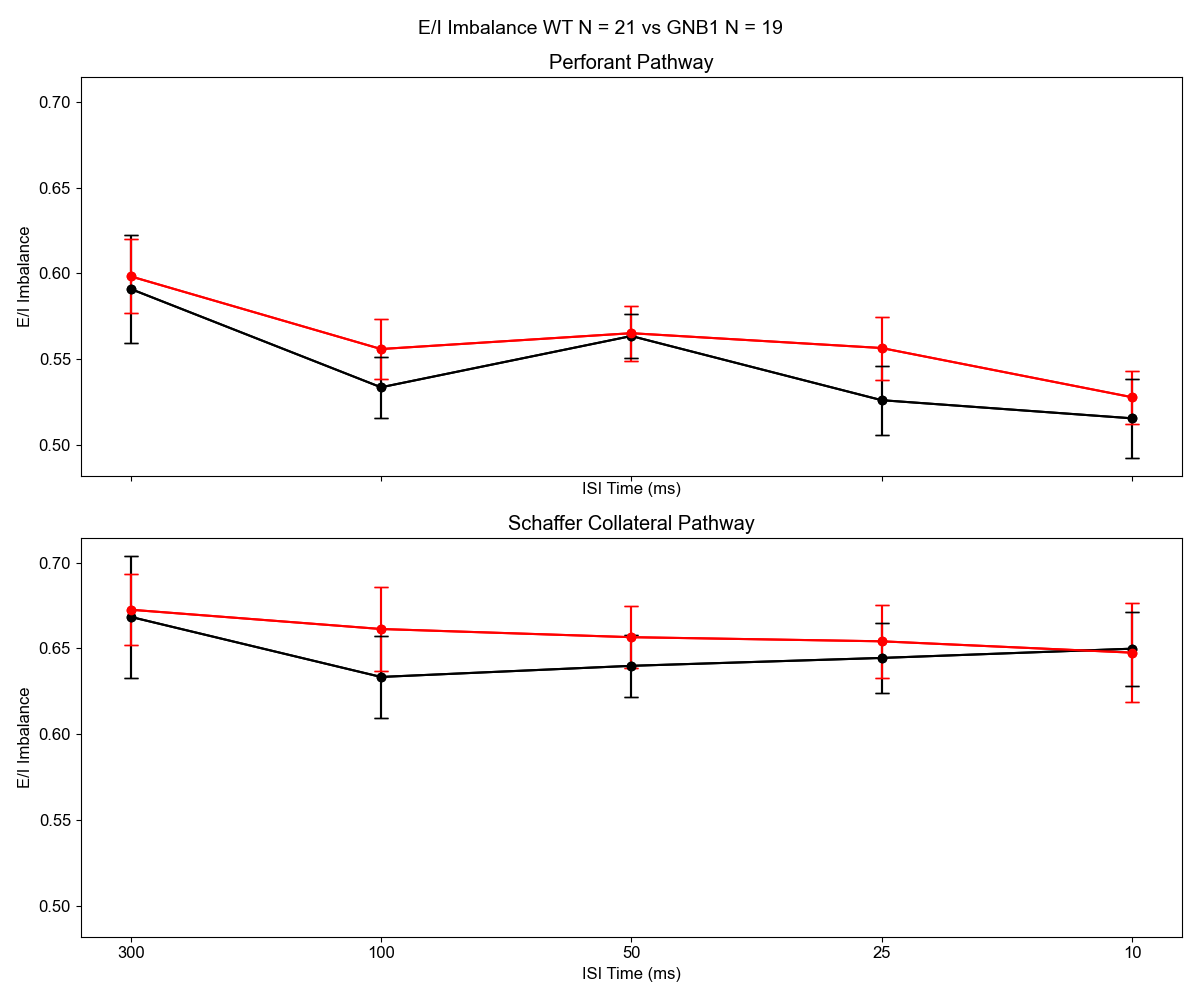

In [68]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True, sharey=True)

fig.suptitle(f'E/I Imbalance WT N = {len(combined_WT_E_I_data["E_I_imbalance"].keys())} vs GNB1 N = {len(combined_GNB1_E_I_data["E_I_imbalance"].keys())}', fontsize=14)
for i, channel in enumerate(channels):
    ax[i].set_title(f'{channel_names[i]}')
    ax[i].set_xlabel('ISI Time (ms)')
    ax[i].set_ylabel('E/I Imbalance')

    for color in colors: 
        means_WT = combined_WT_E_I_data['E_I_imbalance_means']
        std_errors_WT = combined_WT_E_I_data['E_I_imbalance_std_errors']

        means_GNB1 = combined_GNB1_E_I_data['E_I_imbalance_means']
        std_errors_GNB1 = combined_GNB1_E_I_data['E_I_imbalance_std_errors']

        ax[i].errorbar(range(len(ISI_times_list)), [means_WT[channel][ISI_time] for ISI_time in ISI_times_list],
                        yerr=[std_errors_WT[channel][ISI_time] for ISI_time in ISI_times_list],
                        color='black', marker='o', capsize=5)
        ax[i].errorbar(range(len(ISI_times_list)), [means_GNB1[channel][ISI_time] for ISI_time in ISI_times_list],
                        yerr=[std_errors_GNB1[channel][ISI_time] for ISI_time in ISI_times_list],
                        color='red', marker='o', capsize=5)

        ax[i].set_xticks(range(len(ISI_times_list)))
        ax[i].set_xticklabels(ISI_times_list) 

#display p-values as text above each dot in the plot
# for i, channel in enumerate(channels):
#     for j, ISI_time in enumerate(ISI_times_list):
#         ax[i].text(j, means_WT[channel][ISI_time] + 0.06, f'p = {p_values[channel][j]:.3f}', ha='center', font = 'Arial', fontsize=12)


plt.tight_layout()
plt.show()

# #save as svg
# plt.savefig('/Users/samgritz/Library/CloudStorage/GoogleDrive-gritz122@gmail.com/My Drive/Rutgers/Milstein_Lab_Data/GNB1_WT_Project/New_Analysis_Processed_Data/GNB1_data/Processed_data/saved_figures/GNB1_vs_WT_data/combined_all_data/All_Combined_E_I_Imbalance_new.svg', format='svg')

In [50]:
def E_I_imbalance__dict_to_df(data_dict, holding_potential_dict, genotype_label, slicing_solution):
    data = []

    #First Pull out ISI data information including 'max_peak_value' per ISI, Condition, channel
    for cell in data_dict:
        if cell in holding_potential_dict:
            for ISI_time in data_dict[cell]:
                for channel in data_dict[cell][ISI_time]:
                    E_I_imbalance_ratio = data_dict[cell][ISI_time][channel]
                    for condition in holding_potential_dict[cell][ISI_time][channel]:
                        holding_potential = holding_potential_dict[cell][ISI_time][channel][condition]['holding_potential']
                        if E_I_imbalance_ratio:
                            data.append({'Cell': cell, 'ISI': ISI_time, 'E_I_imbalance_ratio': E_I_imbalance_ratio[0] , 'Channel': channel, 'Genotype': genotype_label, 
                            'Holding_Potential': holding_potential[0], 'Slicing_Solution': slicing_solution}) 
                        
    return pd.DataFrame(data)

In [51]:

#WT_NMDG_holding_potentials, WT_sucrose_holding_potentials
# E_I_amplitudes_NMDG, E_I_amplitudes_sucrose, E_I_amplitudes_old
# estimated_inhibition_NMDG, estimated_inhibition_sucrose, estimated_inhibition_old
# E_I_imbalance_NMDG, E_I_imbalance_sucrose, E_I_imbalance_old
# compound_EPSPs_peaks_NMDG, compound_EPSPs_peaks_sucrose, compound_EPSPs_peaks_old


# GNB1_NMDG_holding_potentials, GNB1_sucrose_holding_potentials 
# E_I_amplitudes_NMDG_GNB1, E_I_amplitudes_sucrose_GNB1, E_I_amplitudes_old_GNB1
# estimated_inhibition_NMDG_GNB1, estimated_inhibition_sucrose_GNB1
# E_I_imbalance_NMDG_GNB1, E_I_imbalance_sucrose_GNB1 
# compound_EPSPs_peaks_NMDG_GNB1, compound_EPSPs_peaks_sucrose_GNB1 

In [52]:
WT_E_I_imbalance_df_NMDG = E_I_imbalance__dict_to_df(E_I_imbalance_NMDG,  WT_NMDG_holding_potentials, 'WT', 'NMDG') 
WT_E_I_imbalance_df_sucrose = E_I_imbalance__dict_to_df(E_I_imbalance_sucrose, WT_sucrose_holding_potentials, 'WT', 'Sucrose') 
WT_E_I_imbalance_df_old_NMDG = E_I_imbalance__dict_to_df(E_I_imbalance_old, WT_older_holding_potentials, 'WT', 'NMDG') 

#ALL NMDG Combined
combined_WT_E_I_imbalance_NMDG_df = pd.concat([WT_E_I_imbalance_df_NMDG, WT_E_I_imbalance_df_old_NMDG],  ignore_index=True) 

#All WT combined
combined_WT_E_I_imbalance_df = pd.concat([WT_E_I_imbalance_df_NMDG, WT_E_I_imbalance_df_sucrose, WT_E_I_imbalance_df_old_NMDG],  ignore_index=True) 

GNB1_E_I_imbalance_df_NMDG = E_I_imbalance__dict_to_df(E_I_imbalance_NMDG_GNB1, GNB1_NMDG_holding_potentials, 'GNB1', 'NMDG') 
GNB1_E_I_imbalance_df_sucrose = E_I_imbalance__dict_to_df(E_I_imbalance_sucrose_GNB1, GNB1_sucrose_holding_potentials, 'GNB1', 'Sucrose') 
GNB1_E_I_imbalance_df_old_NMDG = E_I_imbalance__dict_to_df(E_I_imbalance_old_GNB1, GNB1_older_holding_potentials, 'GNB1', 'NMDG') 

#ALL NMDG Combined
combined_GNB1_E_I_imbalance_NMDG_df = pd.concat([GNB1_E_I_imbalance_df_NMDG, GNB1_E_I_imbalance_df_old_NMDG],  ignore_index=True) 

#All GNB1 Combined
combined_GNB1_E_I_imbalance_df = pd.concat([GNB1_E_I_imbalance_df_NMDG, GNB1_E_I_imbalance_df_sucrose, GNB1_E_I_imbalance_df_old_NMDG],  ignore_index=True) 

#All combined
all_combined_E_I_imbalance_df = pd.concat([combined_WT_E_I_imbalance_df, combined_GNB1_E_I_imbalance_df], ignore_index=True) 

#Sucrose Comparison
# all_combined_E_I_imbalance_df = pd.concat([WT_E_I_imbalance_df_sucrose, GNB1_E_I_imbalance_df_sucrose], ignore_index=True) 

#NMDG comparison
# all_combined_E_I_imbalance_df = pd.concat([combined_WT_E_I_imbalance_NMDG_df , combined_GNB1_E_I_imbalance_NMDG_df], ignore_index=True) 



In [53]:
df_imbalance = all_combined_E_I_imbalance_df 
df_imbalance 


,Cell,ISI,E_I_imbalance_ratio,Channel,Genotype,Holding_Potential,Slicing_Solution
0,05162024_updated_08182024,300,0.432195,channel_1,WT,-70.884766,NMDG
1,05162024_updated_08182024,300,0.432195,channel_1,WT,-70.724531,NMDG
2,05162024_updated_08182024,300,0.507346,channel_2,WT,-71.558598,NMDG
3,05162024_updated_08182024,300,0.507346,channel_2,WT,-71.569830,NMDG
4,05162024_updated_08182024,100,0.532394,channel_1,WT,-70.679656,NMDG
...,...,...,...,...,...,...,...
411,04042024_c2_processed_data,50,0.609954,channel_2,GNB1,-70.798333,NMDG
412,04042024_c2_processed_data,25,0.491094,channel_1,GNB1,-69.614434,NMDG
413,04042024_c2_processed_data,25,0.491094,channel_1,GNB1,-70.209335,NMDG
414,04042024_c2_processed_data,25,0.542212,channel_2,GNB1,-69.825473,NMDG


### Linear Mixed Effects

In [54]:
df = df_imbalance

#create conjugated group
df = df.copy()

# Create 'Conjugated_Group' by concatenating 'Condition', 'Genotype', and 'Channel'
df['Conjugated_Group'] = df['Genotype'].str.cat(df[['Channel']], sep='.')


In [55]:
df 

,Cell,ISI,E_I_imbalance_ratio,Channel,Genotype,Holding_Potential,Slicing_Solution,Conjugated_Group
0,05162024_updated_08182024,300,0.432195,channel_1,WT,-70.884766,NMDG,WT.channel_1
1,05162024_updated_08182024,300,0.432195,channel_1,WT,-70.724531,NMDG,WT.channel_1
2,05162024_updated_08182024,300,0.507346,channel_2,WT,-71.558598,NMDG,WT.channel_2
3,05162024_updated_08182024,300,0.507346,channel_2,WT,-71.569830,NMDG,WT.channel_2
4,05162024_updated_08182024,100,0.532394,channel_1,WT,-70.679656,NMDG,WT.channel_1
...,...,...,...,...,...,...,...,...
411,04042024_c2_processed_data,50,0.609954,channel_2,GNB1,-70.798333,NMDG,GNB1.channel_2
412,04042024_c2_processed_data,25,0.491094,channel_1,GNB1,-69.614434,NMDG,GNB1.channel_1
413,04042024_c2_processed_data,25,0.491094,channel_1,GNB1,-70.209335,NMDG,GNB1.channel_1
414,04042024_c2_processed_data,25,0.542212,channel_2,GNB1,-69.825473,NMDG,GNB1.channel_2


In [56]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

#model = smf.mixedlm('Dependent_Variable ~ Independent_Variables', groups=df['Grouping_Variable'], data=df)

WT_SC_E_I_imbalance_results = mixedlm("E_I_imbalance_ratio ~ ISI * C(Conjugated_Group, Treatment('WT.channel_1'))", data=df, 
                 groups=df["Cell"]).fit()

WT_PP_E_I_imbalance_results = mixedlm("E_I_imbalance_ratio ~ ISI * C(Conjugated_Group, Treatment('WT.channel_2'))", data=df,
                    groups=df["Cell"]).fit()

GNB1_SC_E_I_imbalance_results = mixedlm("E_I_imbalance_ratio ~ ISI * C(Conjugated_Group, Treatment('GNB1.channel_1'))", data=df,
                    groups=df["Cell"]).fit()

GNB1_PP_E_I_imbalance_results = mixedlm("E_I_imbalance_ratio ~ ISI * C(Conjugated_Group, Treatment('GNB1.channel_2'))", data=df,
                    groups=df["Cell"]).fit()

#create a dataframe of the results
WT_SC_E_I_imbalance_results = WT_SC_E_I_imbalance_results.summary().tables[1]

WT_PP_E_I_imbalance_results = WT_PP_E_I_imbalance_results.summary().tables[1]

GNB1_SC_E_I_imbalance_results = GNB1_SC_E_I_imbalance_results.summary().tables[1]

GNB1_PP_E_I_imbalance_results = GNB1_PP_E_I_imbalance_results.summary().tables[1]




#Compare all
# model = mixedlm("E_I_imbalance_ratio ~ C(Conjugated_Group, Treatment('Control.WT.channel_1')) : C(ISI, Treatment(300))", data=df, 
#                  groups=df["Cell"])  


/Users/samgritz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/samgritz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/samgritz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/samgritz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [57]:
WT_PP_SC_E_I_imbalance_results = WT_SC_E_I_imbalance_results[WT_SC_E_I_imbalance_results['Coef.'].index.str.contains('WT.channel_1') & 
                                                       WT_SC_E_I_imbalance_results['Coef.'].index.str.contains('WT.channel_2') &
                                                       WT_SC_E_I_imbalance_results['Coef.'].index.str.contains('ISI')]
GNB1_PP_SC_E_I_imbalance_results = GNB1_SC_E_I_imbalance_results[GNB1_SC_E_I_imbalance_results['Coef.'].index.str.contains('GNB1.channel_1') & 
                                                       GNB1_SC_E_I_imbalance_results['Coef.'].index.str.contains('GNB1.channel_2') &
                                                       GNB1_SC_E_I_imbalance_results['Coef.'].index.str.contains('ISI')]

In [58]:
WT_PP_SC_E_I_imbalance_results

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
"ISI:C(Conjugated_Group, Treatment('WT.channel_1'))[T.WT.channel_2]",-0.000,0.000,-2.114,0.034,-0.000,-0.000


In [59]:
GNB1_PP_SC_E_I_imbalance_results

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
"ISI:C(Conjugated_Group, Treatment('GNB1.channel_1'))[T.GNB1.channel_2]",-0.000,0.000,-1.732,0.083,-0.000,0.000


In [60]:
GNB1_WT_SC_E_I_imbalance_results = WT_SC_E_I_imbalance_results[WT_SC_E_I_imbalance_results['Coef.'].index.str.contains('WT.channel_1') & 
                                                         WT_SC_E_I_imbalance_results['Coef.'].index.str.contains('GNB1.channel_1') &
                                                            WT_SC_E_I_imbalance_results['Coef.'].index.str.contains('ISI')]

GNB1_WT_PP_E_I_imbalance_results = WT_PP_E_I_imbalance_results[WT_PP_E_I_imbalance_results['Coef.'].index.str.contains('WT.channel_2') &
                                                            WT_PP_E_I_imbalance_results['Coef.'].index.str.contains('GNB1.channel_2') &
                                                            WT_PP_E_I_imbalance_results['Coef.'].index.str.contains('ISI')]

In [61]:
GNB1_WT_SC_E_I_imbalance_results

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
"ISI:C(Conjugated_Group, Treatment('WT.channel_1'))[T.GNB1.channel_1]",-0.000,0.000,-0.552,0.581,-0.000,0.000


In [62]:
GNB1_WT_PP_E_I_imbalance_results

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
"ISI:C(Conjugated_Group, Treatment('WT.channel_2'))[T.GNB1.channel_2]",-0.000,0.000,-0.158,0.874,-0.000,0.000


In [63]:
all_combined_E_I_imbalance_results = pd.concat([WT_PP_SC_E_I_imbalance_results, GNB1_PP_SC_E_I_imbalance_results, GNB1_WT_SC_E_I_imbalance_results, GNB1_WT_PP_E_I_imbalance_results], axis=0)

In [64]:
all_combined_E_I_imbalance_results

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
"ISI:C(Conjugated_Group, Treatment('WT.channel_1'))[T.WT.channel_2]",-0.000,0.000,-2.114,0.034,-0.000,-0.000
"ISI:C(Conjugated_Group, Treatment('GNB1.channel_1'))[T.GNB1.channel_2]",-0.000,0.000,-1.732,0.083,-0.000,0.000
"ISI:C(Conjugated_Group, Treatment('WT.channel_1'))[T.GNB1.channel_1]",-0.000,0.000,-0.552,0.581,-0.000,0.000
"ISI:C(Conjugated_Group, Treatment('WT.channel_2'))[T.GNB1.channel_2]",-0.000,0.000,-0.158,0.874,-0.000,0.000


### Pairwise comparison For certain Conditions

In [65]:
import numpy as np
from statsmodels.stats.multitest import multipletests

# Ensure the p-values are numeric (convert the 'P>|z|' column to float)
all_combined_E_I_imbalance_results['P>|z|'] = pd.to_numeric(all_combined_E_I_imbalance_results['P>|z|'], errors='coerce')

# Drop rows with NaN p-values (if necessary)
all_combined_E_I_imbalance_results = all_combined_E_I_imbalance_results.dropna(subset=['P>|z|'])

# Extract the p-values as a numpy array
p_values = all_combined_E_I_imbalance_results['P>|z|'].values

# Perform multiple comparisons correction (FDR method is used here)
reject, p_values_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Add the corrected p-values and rejection decision to the dataframe
all_combined_E_I_imbalance_results['p_values_corrected'] = p_values_corrected
all_combined_E_I_imbalance_results['reject_null'] = reject

# Display the updated dataframe
all_combined_E_I_imbalance_results




,Coef.,Std.Err.,z,P>|z|,[0.025,0.975],p_values_corrected,reject_null
"ISI:C(Conjugated_Group, Treatment('WT.channel_1'))[T.WT.channel_2]",-0.000,0.000,-2.114,0.034,-0.000,-0.000,0.136000,False
"ISI:C(Conjugated_Group, Treatment('GNB1.channel_1'))[T.GNB1.channel_2]",-0.000,0.000,-1.732,0.083,-0.000,0.000,0.166000,False
"ISI:C(Conjugated_Group, Treatment('WT.channel_1'))[T.GNB1.channel_1]",-0.000,0.000,-0.552,0.581,-0.000,0.000,0.774667,False
"ISI:C(Conjugated_Group, Treatment('WT.channel_2'))[T.GNB1.channel_2]",-0.000,0.000,-0.158,0.874,-0.000,0.000,0.874000,False


In [66]:
#Compare all
# model = mixedlm("E_I_imbalance_ratio ~ C(Conjugated_Group, Treatment('Control.WT.channel_1')) : C(ISI, Treatment(300))", data=df, 
#                  groups=df["Cell"])  